In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

- **`import cv2`**: Imports the OpenCV library, which is used for computer vision tasks and image processing.
- **`import numpy as np`**: Imports the NumPy library, essential for numerical computations and handling arrays.
- **`import matplotlib.pyplot as plt`**: Imports the Matplotlib library's plotting module for creating visualizations.
- **`from zipfile import ZipFile`**: Allows working with ZIP files, including extracting and creating ZIP archives.
- **`from urllib.request import urlretrieve`**: Enables downloading files from the internet using a specified URL.
- **`from IPython.display import Image`**: Allows displaying images in Jupyter notebooks.
- **`%matplotlib inline`**: A Jupyter magic command that enables inline plotting, displaying Matplotlib plots directly below the code cells.


In [4]:
def download_and_unzip(url, save_path):
    print("Download initiated", end="")

    #Download the zip file
    urlretrieve(url, save_path)

    #Extract Zip file
    try:
        with ZipFile(save_path) as z:
            #extractall() specifies the directory where the files will be extracted.
            z.extractall(os.path.split(save_path)[0])            
            print("Done")
    except Exception as e:
        print("\n Invalid file")

-> If `save_path` is `"cwd/opencv_bootcamp_assets_NB1.zip"`, `os.path.split(save_path)` would return `("cwd", "opencv_bootcamp_assets_NB1.zip")` as a tuple.

-> `[0]` accesses the directory path `"cwd"`.


In [3]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"
#os.getcwd() returns pwd as a string
#This is joined os.path.join with the text to form /cwd/opencv...
asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

#check if path exists
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [6]:
'''
Lesson 1
Reading and Displaying Images
'''
Image(filename="checkerboard_18x18.png")

#### Reading Images using OpenCV

-> We use `cv2.imread()`

-> `retval = cv2.imread(filename, flags)` ::: `filename` is a mandatory argument; `flags` is `1` by default.

##### Flags: 
1. `cv2.IMREAD_GRAYSCALE` or `0`: Loads image in grayscale mode
2. `cv2.IMREAD_COLOR` or `1`: Loads a color image. Any transparency of the image will be neglected. It is the default flag.
3. `cv2.IMREAD_UNCHANGED` or `-1`: Loads the image as is, including the alpha channel.

###### Examples:
1. `retval = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)` 
2. `retval = cv2.imread("image.png", 0)`


In [14]:
retval = cv2.imread("checkerboard_18x18.png",0)
print(retval)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [28]:
'''Display Image Attributes'''
print(f"Image dimensions (H, W) is :{retval.shape}")
print(f"Image data type is :{retval.dtype}")

Image dimensions (H, W, C) is :(18, 18)
Image data type is :uint8


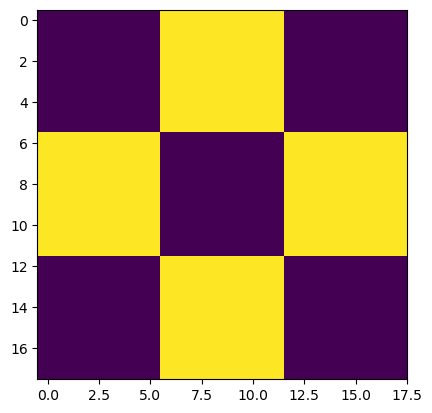

In [20]:
'''Display Image using MatPlotLib'''
plt.imshow(retval)
plt.show() #image wont show without this, only address

Even though the image was read in as a grayscale image, 

`retval = cv2.imread("checkerboard_18x18.png", 0)` 
(0 for grayscale) 

it won't necessarily display in grayscale when using `imshow()`.

##### Note:
- Matplotlib uses different color maps, and it's possible that the grayscale color map is not set.

-> To display grayscale using `matplotlib.pyplot`, use `cmap='gray'`.


In [ ]:
retval_fuzzy = cv2.imread('checkerboard_fuzzy_18x18.jpg', 0)
print(retval_fuzzy)
plt.imshow(retval_fuzzy, cmap='gray');plt.show()

In [ ]:
'''
Lesson 2:
Handling Channels
'''
Image(filename='coca-cola-logo.png')

#### Channels refers to the number of color channels in the image:

- **1 Channel**: Grayscale images (black and white) have a single channel.
- **3 Channels**: RGB (Red, Green, Blue) images have three channels, where each channel represents the intensity of the respective color at each pixel.
- **4 Channels**: RGBA images have four channels, adding an alpha channel for transparency.

##### Example:
```python
print("Image size (H, W, C) is:", coke_img.shape)


In [29]:
'''Read and Display Color'''
retval_coke = cv2.imread('coca-cola-logo.png', 1)
print(f"Image Dimensions: {retval_coke.shape}")
print(f'image DataType: {retval_coke.dtype}')


Image Dimensions: (700, 700, 3)
image DataType: uint8


In [ ]:
plt.imshow(retval_coke) #This displays a blue coke instead of red.

#### This displays a blue coke instead of red.
This is because Matplotlib expects the image in RGB format, whereas OpenCV stores images in BGR format.

To convert BGR to RGB, you can use:
1. Numpy slicing: `[:, :, ::-1]`

2. OpenCV function: `cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)`


In [ ]:
'''Reversing BGR to RBG'''
retval_coke_Numpy_Slicing = retval_coke[:, :, ::-1]
retval_coke_OpenCV_Func = cv2.cvtColor(retval_coke, cv2.COLOR_BGR2RGB)
#Both should return the same thing.
plt.imshow(retval_coke_Numpy_Slicing);plt.show()

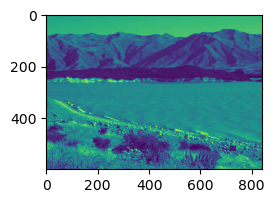

In [32]:
'''
Lesson 3:
Splitting and Merging Color Channels
cv2.split() Divides multichannel array to several single channeled arrays
cv2.merge() Merge several array to make a sung
'''
retval_NewZealand = cv2.imread('New_Zealand_Lake.jpg', cv2.IMREAD_COLOR) #0
b, g, r = cv2.split(retval_NewZealand)
'''We split in BGR since opencv stores image in BGR'''
plt.figure(figsize=[10, 2]) #This specifies image size
#figsize gives dimensions
plt.imshow(r);plt.show()

plt.subplot() function in Matplotlib is used to create a grid of subplots within a single figure. 
Syntax: plt.subplot(nrows, ncols, index)

    1. nrows: Number of rows of subplots.
    2. ncols: Number of columns of subplots.
    3. index: The index of the current subplot (starting from 1).

eg: plt.subplot(141)
    Creates a subplot in a 1-row, 4-column grid, and selects the first subplot.

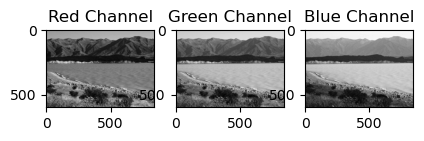

In [18]:
'''Displaying Channels individually'''
plt.subplot(141);plt.imshow(r, cmap='grey');plt.title('Red Channel')
plt.subplot(142);plt.imshow(g, cmap='grey');plt.title('Green Channel')
plt.subplot(143);plt.imshow(b, cmap='grey');plt.title('Blue Channel')
plt.show()

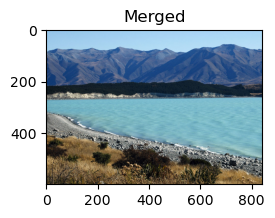

In [22]:
'''Merging the channels'''
retval_NewZealand_merged = cv2.merge((b, g, r))
'''Remember image was split as BGR hence we need to convert
to RGB for matplotlib'''
retval_NewZealand_merged_RGB = cv2.cvtColor(retval_NewZealand_merged, cv2.COLOR_BGR2RGB)
plt.figure(figsize=[10, 2])
plt.imshow(retval_NewZealand_merged_RGB);plt.title('Merged');plt.show()

In [ ]:
'''
Lesson 4
Converting to diffrent color spaces
'''


#### Bit memory allocation
cv2.cvtColor() Converts an image from one color space to another. The function converts an input image from one color space to another.
In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). 
Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed).

There are 24 bits per pixel
1 byte= 8bits hence 3 bytes per pixel
So in a standard (24-bit) or (3byte) color image:
1.  First byte is Blue component, B
2.  Second byte will be Green  G
3.  Third byte will be Red. R

For instance, if a pixel's color is fully blue, the representation would be something like (255, 0, 0) in BGR format, where:
1. The Blue byte is 255 (full intensity),
2. The Green byte is 0,
3. The Red byte is 0.

##### Why 24-Bit?
The term "24-bit color" indicates that each pixel has a total of 24 bits available, which provides 8 bits per channel (Blue, Green, Red). This allows each channel to represent 256 levels of intensity (0-255), yielding a total of 16,777,216 possible colors for each pixel (256^3).

##### Syntax

dst = cv2.cvtColor( src, code )

The src parameter is the input image you want to convert. It must be in one of these formats:

1. 8-bit unsigned integer (standard images, values between 0–255 for each channel).
2. 16-bit unsigned integer (values between 0–65535, often used in higher dynamic range images).
3. Single-precision floating-point (usually for processing in a range from 0.0 to 1.0 or higher if normalized).

Common Color codes:

1. cv2.COLOR_BGR2RGB: Converts an image from BGR (OpenCV default) to RGB (standard color for display).
2. cv2.COLOR_BGR2GRAY: Converts a BGR image to grayscale.
3. cv2.COLOR_RGB2GRAY: Converts an RGB image to grayscale.
4. cv2.COLOR_GRAY2BGR: Converts a grayscale image back to BGR format.
5. cv2.COLOR_BGR2HSV: Converts from BGR to HSV (Hue, Saturation, Value).
6. cv2.COLOR_HSV2BGR: Converts from HSV to BGR.
7. cv2.COLOR_BGR2LAB: Converts BGR to CIELAB color space, which models human vision more    closely.
8. cv2.COLOR_BGR2YCrCb: Converts BGR to YCrCb (luminance and chrominance).
9. cv2.COLOR_BGR2XYZ: Converts BGR to the CIE 1931 color space.
10. cv2.COLOR_BGR2LUV: Converts BGR to the CIE Luv* color space.


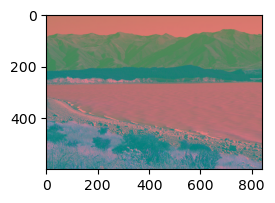

In [31]:
Img_Cielab = cv2.cvtColor(retval_NewZealand,cv2.COLOR_BGR2Lab)
plt.figure(figsize=[10,2])
plt.imshow(Img_Cielab);plt.show()

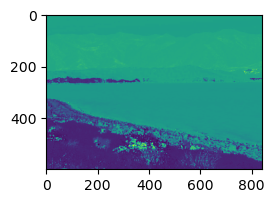

In [42]:
'''
Modyfying Individual Channel
Lets change to hsv and modify the hue channel
'''

img_hsv = cv2.cvtColor(retval_NewZealand, cv2.COLOR_BGR2HSV)
h, s, v =  cv2.split(img_hsv)
plt.figure(figsize=[10,2])
h_new = h + 50
plt.imshow(h_new);plt.show()


Suppose a pixel has an initial hue value of h = 20. After adding 50:

Original hue: 20
New hue: 20 + 50 = 70

Note: Hue Wrap-Around — Since hue values in OpenCV are capped at 179, any addition resulting in values over 179 will wrap around. For instance, if a pixel has h = 150, h + 50 = 200 would wrap to 20 (200 - 180).

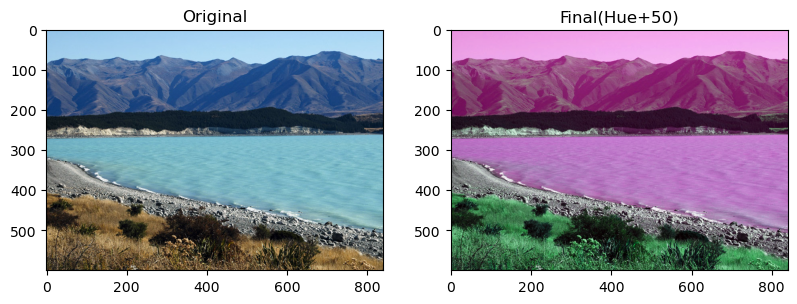

In [45]:
img_hsv_merged = cv2.merge((h_new, s, v))
Final_img = cv2.cvtColor(img_hsv_merged, cv2.COLOR_HSV2RGB)
plt.figure(figsize=[20,5])

plt.subplot(141);plt.imshow(retval_NewZealand[:, :, ::-1]);plt.title('Original')
plt.subplot(142);plt.imshow(Final_img);plt.title('Final(Hue+50)')
plt.show()

In [ ]:
'''
Lesson 5
'''

cv2.imwrite( filename, img[, params] )

The function has 2 required arguments:
1. filename: This can be an absolute or relative path.
2. img: Image or Images to be saved.


In [46]:
cv2.imwrite('Final_img.png', Final_img)

True

## Summary

1. retval = cv2.imread( filename[, flags] )
2. b ,g, r = cv2.split() or cv2.merge(b, g, r)
3. b_new = b + value
4. Final = cv2.cvtColor(img, cv2.COLOR_BGR_RGB) or img[ :, :, ::-1 ]
5. plt.imshow(); plt.show() eg plt.imshow(retval[ :, :, ::-1 ])
6. plt.subplot(141); plt.imshow(img, cmap='gray); plt.title('title'); plt.show()
7. plt.imwrite('name.png', img) `Note: imwrite uses bgr format`


## Note Better
1. If you do an imwrite and image already exists it is overwritten

2. If you imread an image in grayscale cv2.imread('img.jpeg', 0 ) then try to convert BGR2GRAY , you will get error. Since the read image is single-channel image (2D array)

Recall: 
- **1 Channel**: Grayscale images (black and white) have a single channel.
- **3 Channels**: RGB (Red, Green, Blue) images have three channels, where each channel represents the intensity of the respective color at each pixel.
- **4 Channels**: RGBA images have four channels, adding an alpha channel for transparency.

This applies to all relevant cases.
##### Flags: 
1. `cv2.IMREAD_GRAYSCALE` or `0`: Loads image in grayscale mode
2. `cv2.IMREAD_COLOR` or `1`: Loads a color image. Any transparency of the image will be neglected. It is the default flag.
3. `cv2.IMREAD_UNCHANGED` or `-1`: Loads the image as is, including the alpha channel.